In [3]:
import pandas as pd
from binance.client import Client
import datetime as dt

In [4]:
api_key = '' 
api_secret = ''
client = Client(api_key, api_secret)

<AxesSubplot:title={'center':'BTCUSDT'}>

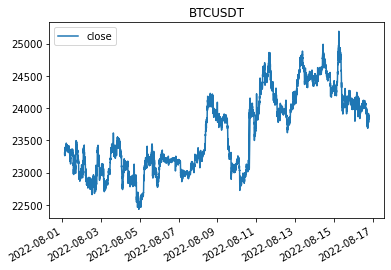

In [8]:
symbol = "BTCUSDT"
interval = '1m'
#Client.KLINE_INTERVAL_1MINUTE 
klines = client.get_historical_klines(symbol, interval, "1 Aug, 2022")
data = pd.DataFrame(klines)
 
# create colums name
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav',
                'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
            
# change the timestamp
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data.to_csv(symbol+'.csv', index = None, header=True)
#convert data to float and plot
data = data.astype(float)
data["close"].plot(title = 'BTCUSDT', legend = 'close')